This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [13]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.6040 - accuracy: 0.6091 - val_loss: 0.5142 - val_accuracy: 0.8058
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4036 - accuracy: 0.8838 - val_loss: 0.3551 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2471 - accuracy: 0.9313 - val_loss: 0.2914 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1717 - accuracy: 0.9497 - val_loss: 0.2823 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1275 - accuracy: 0.9653 - val_loss: 0.2908 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0974 - accuracy: 0.9775 - val_loss: 0.3082 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0748 - accuracy: 0.9852 - val_loss: 0.3321 - val_accuracy: 0.8806
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

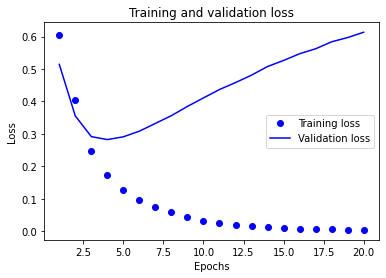

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

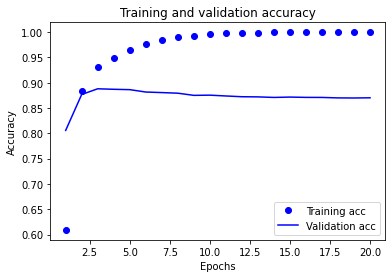

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4584 - accuracy: 0.8155
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2348 - accuracy: 0.9154
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1730 - accuracy: 0.9398
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3344 - accuracy: 0.8756


In [20]:
results

[0.33442655205726624, 0.8755999803543091]

### Using a trained model to generate predictions on new data

In [22]:
model.predict(x_test)

array([[0.20646685],
       [0.999994  ],
       [0.83366156],
       ...,
       [0.12164986],
       [0.08138174],
       [0.84866035]], dtype=float32)

In [23]:
model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 31ms/step - loss: 0.5052 - accuracy: 0.7988
Epoch 2/5
49/49 [==============================] - 1s 30ms/step - loss: 0.2535 - accuracy: 0.9091
Epoch 3/5
49/49 [==============================] - 1s 30ms/step - loss: 0.1840 - accuracy: 0.9352
Epoch 4/5
49/49 [==============================] - 2s 31ms/step - loss: 0.1484 - accuracy: 0.9490
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.3338 - accuracy: 0.8764


In [30]:
results

[0.3337852656841278, 0.8764399886131287]

Model-1.1 Trained with 3 layers

In [25]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5640 - accuracy: 0.7642 - val_loss: 0.3917 - val_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2794 - accuracy: 0.9074 - val_loss: 0.2854 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1759 - accuracy: 0.9412 - val_loss: 0.2813 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1201 - accuracy: 0.9638 - val_loss: 0.3043 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0847 - accuracy: 0.9778 - val_loss: 0.3385 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0574 - accuracy: 0.9878 - val_loss: 0.3821 - val_accuracy: 0.8789
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0377 - accuracy: 0.9935 - val_loss: 0.4306 - val_accuracy: 0.8758
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

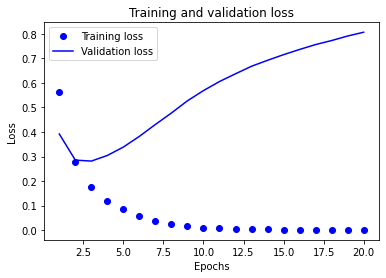

In [31]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

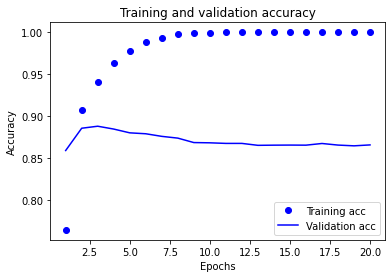

In [32]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/12
49/49 [==============================] - 1s 30ms/step - loss: 0.2688 - accuracy: 0.9289
Epoch 2/12
49/49 [==============================] - 1s 30ms/step - loss: 0.1259 - accuracy: 0.9593
Epoch 3/12
49/49 [==============================] - 1s 30ms/step - loss: 0.0784 - accuracy: 0.9779
Epoch 4/12
49/49 [==============================] - 1s 30ms/step - loss: 0.0519 - accuracy: 0.9875
Epoch 5/12
49/49 [==============================] - 1s 29ms/step - loss: 0.0346 - accuracy: 0.9942
Epoch 6/12
49/49 [==============================] - 1s 30ms/step - loss: 0.0228 - accuracy: 0.9967
Epoch 7/12
49/49 [==============================] - 1s 30ms/step - loss: 0.0157 - accuracy: 0.9978
Epoch 8/12
49/49 [==============================] - 1s 30ms/step - loss: 0.0108 - accuracy: 0.9985
Epoch 9/12
49/49 [==============================] - 2s 31ms/step - loss: 0.0075 - accuracy: 0.9989
Epoch 10/12
49/49 [==============================] - 1s 29ms/step - loss: 0.0051 - accuracy: 0.9993
Epoch 11/

[0.33442655205726624, 0.8755999803543091]

HYPERTUNING

Training the model with 32-Units

In [33]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5187 - accuracy: 0.7771 - val_loss: 0.3337 - val_accuracy: 0.8736
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2377 - accuracy: 0.9145 - val_loss: 0.2779 - val_accuracy: 0.8898
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1494 - accuracy: 0.9485 - val_loss: 0.2910 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1014 - accuracy: 0.9699 - val_loss: 0.3171 - val_accuracy: 0.8827
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0686 - accuracy: 0.9826 - val_loss: 0.3562 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0466 - accuracy: 0.9912 - val_loss: 0.4031 - val_accuracy: 0.8764
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0294 - accuracy: 0.9961 - val_loss: 0.4494 - val_accuracy: 0.8747
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

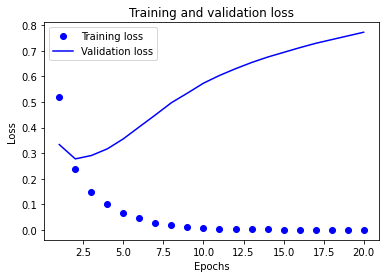

In [38]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

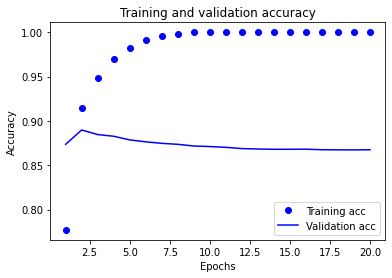

In [39]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 2s 35ms/step - loss: 0.2572 - accuracy: 0.9287
Epoch 2/8
49/49 [==============================] - 2s 33ms/step - loss: 0.1110 - accuracy: 0.9635
Epoch 3/8
49/49 [==============================] - 2s 33ms/step - loss: 0.0595 - accuracy: 0.9828
Epoch 4/8
49/49 [==============================] - 2s 34ms/step - loss: 0.0323 - accuracy: 0.9932
Epoch 5/8
49/49 [==============================] - 2s 33ms/step - loss: 0.0169 - accuracy: 0.9978
Epoch 6/8
49/49 [==============================] - 2s 33ms/step - loss: 0.0091 - accuracy: 0.9993
Epoch 7/8
49/49 [==============================] - 2s 34ms/step - loss: 0.0052 - accuracy: 0.9998
Epoch 8/8
782/782 [==============================] - 3s 3ms/step - loss: 0.7944 - accuracy: 0.8558


[0.794360876083374, 0.8557999730110168]

Training the model with 64-Units

In [40]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.4693 - accuracy: 0.8041 - val_loss: 0.3038 - val_accuracy: 0.8790
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2039 - accuracy: 0.9231 - val_loss: 0.2818 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1201 - accuracy: 0.9599 - val_loss: 0.3212 - val_accuracy: 0.8802
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0723 - accuracy: 0.9790 - val_loss: 0.3761 - val_accuracy: 0.8791
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0406 - accuracy: 0.9909 - val_loss: 0.4390 - val_accuracy: 0.8770
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0224 - accuracy: 0.9967 - val_loss: 0.5051 - val_accuracy: 0.8733
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0121 - accuracy: 0.9994 - val_loss: 0.5671 - val_accuracy: 0.8697
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

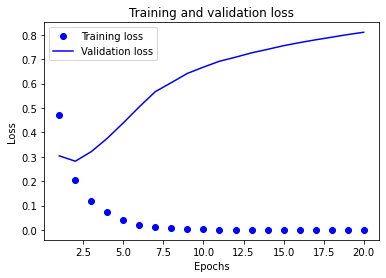

In [41]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

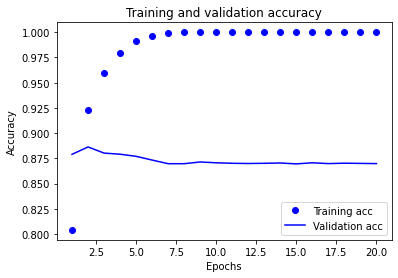

In [42]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [43]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 2s 44ms/step - loss: 0.2680 - accuracy: 0.9204
Epoch 2/8
49/49 [==============================] - 2s 43ms/step - loss: 0.1114 - accuracy: 0.9621
Epoch 3/8
49/49 [==============================] - 2s 43ms/step - loss: 0.0487 - accuracy: 0.9870
Epoch 4/8
49/49 [==============================] - 2s 43ms/step - loss: 0.0200 - accuracy: 0.9967
Epoch 5/8
49/49 [==============================] - 2s 43ms/step - loss: 0.0088 - accuracy: 0.9990
Epoch 6/8
49/49 [==============================] - 2s 43ms/step - loss: 0.0041 - accuracy: 0.9997
Epoch 7/8
49/49 [==============================] - 2s 43ms/step - loss: 0.0023 - accuracy: 0.9999
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.7633 - accuracy: 0.8609


[0.7633427977561951, 0.8608800172805786]

Training the model with 128-Units



In [44]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 4s 104ms/step - loss: 0.4304 - accuracy: 0.8099 - val_loss: 0.2851 - val_accuracy: 0.8872
Epoch 2/20
30/30 [==============================] - 3s 88ms/step - loss: 0.1766 - accuracy: 0.9337 - val_loss: 0.2977 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 3s 86ms/step - loss: 0.0971 - accuracy: 0.9681 - val_loss: 0.3556 - val_accuracy: 0.8790
Epoch 4/20
30/30 [==============================] - 3s 87ms/step - loss: 0.0510 - accuracy: 0.9856 - val_loss: 0.4303 - val_accuracy: 0.8758
Epoch 5/20
30/30 [==============================] - 3s 88ms/step - loss: 0.0238 - accuracy: 0.9952 - val_loss: 0.5027 - val_accuracy: 0.8728
Epoch 6/20
30/30 [==============================] - 3s 87ms/step - loss: 0.0091 - accuracy: 0.9993 - val_loss: 0.5630 - val_accuracy: 0.8718
Epoch 7/20
30/30 [==============================] - 3s 87ms/step - loss: 0.0039 - accuracy: 0.9999 - val_loss: 0.6059 - val_accuracy: 0.8732
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

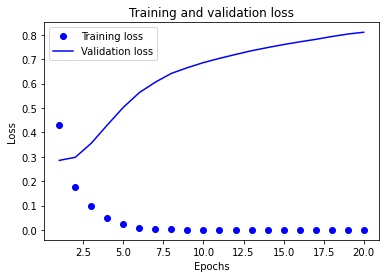

In [45]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

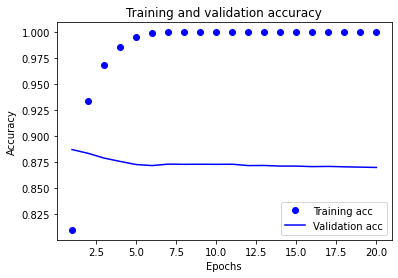

In [46]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 4s 72ms/step - loss: 0.2348 - accuracy: 0.9212
Epoch 2/8
49/49 [==============================] - 4s 72ms/step - loss: 0.0857 - accuracy: 0.9719
Epoch 3/8
49/49 [==============================] - 3s 71ms/step - loss: 0.0251 - accuracy: 0.9939
Epoch 4/8
49/49 [==============================] - 4s 72ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 5/8
49/49 [==============================] - 3s 71ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 6/8
49/49 [==============================] - 3s 70ms/step - loss: 8.0293e-04 - accuracy: 1.0000
Epoch 7/8
49/49 [==============================] - 4s 73ms/step - loss: 4.5920e-04 - accuracy: 1.0000
Epoch 8/8
782/782 [==============================] - 4s 5ms/step - loss: 0.8441 - accuracy: 0.8614


[0.844079315662384, 0.8613600134849548]

Loss Function

In [48]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.1781 - accuracy: 0.7715 - val_loss: 0.1151 - val_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0817 - accuracy: 0.9065 - val_loss: 0.0884 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0555 - accuracy: 0.9391 - val_loss: 0.0839 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0414 - accuracy: 0.9596 - val_loss: 0.0834 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0320 - accuracy: 0.9730 - val_loss: 0.0847 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0251 - accuracy: 0.9803 - val_loss: 0.0868 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0197 - accuracy: 0.9861 - val_loss: 0.0890 - val_accuracy: 0.8796
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

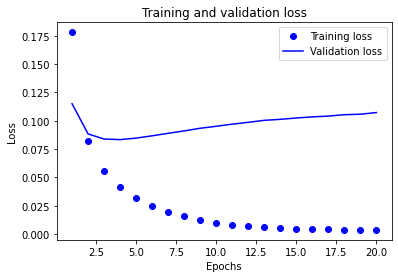

In [49]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


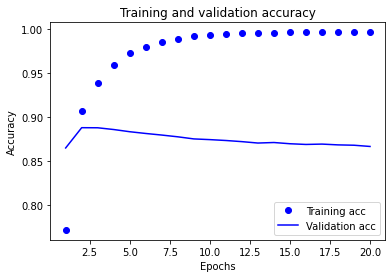

In [50]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 30ms/step - loss: 0.0491 - accuracy: 0.9411
Epoch 2/8
49/49 [==============================] - 1s 30ms/step - loss: 0.0374 - accuracy: 0.9559
Epoch 3/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0268 - accuracy: 0.9721
Epoch 4/8
49/49 [==============================] - 1s 30ms/step - loss: 0.0214 - accuracy: 0.9794
Epoch 5/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0185 - accuracy: 0.9823
Epoch 6/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0169 - accuracy: 0.9841
Epoch 7/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0156 - accuracy: 0.9852
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.1203 - accuracy: 0.8584


[0.12027902156114578, 0.8583599925041199]

Training the model using Tanh Activation Function

In [52]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5448 - accuracy: 0.7863 - val_loss: 0.4192 - val_accuracy: 0.8592
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3235 - accuracy: 0.9004 - val_loss: 0.3113 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2206 - accuracy: 0.9328 - val_loss: 0.2790 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1617 - accuracy: 0.9537 - val_loss: 0.2755 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1214 - accuracy: 0.9702 - val_loss: 0.2854 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0924 - accuracy: 0.9802 - val_loss: 0.3020 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0700 - accuracy: 0.9874 - val_loss: 0.3242 - val_accuracy: 0.8769
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

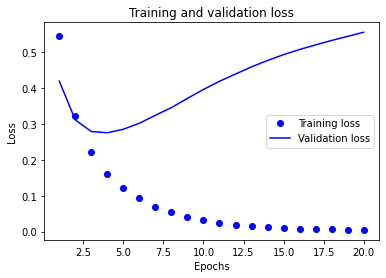

In [53]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

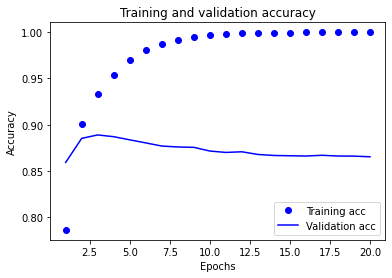

In [54]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 30ms/step - loss: 0.2034 - accuracy: 0.9412
Epoch 2/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1148 - accuracy: 0.9653
Epoch 3/8
49/49 [==============================] - 1s 30ms/step - loss: 0.0808 - accuracy: 0.9785
Epoch 4/8
49/49 [==============================] - 1s 31ms/step - loss: 0.0602 - accuracy: 0.9860
Epoch 5/8
49/49 [==============================] - 1s 30ms/step - loss: 0.0457 - accuracy: 0.9909
Epoch 6/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0351 - accuracy: 0.9942
Epoch 7/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0277 - accuracy: 0.9964
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.6505 - accuracy: 0.8522


[0.6505259275436401, 0.8522400259971619]

Regularisation

In [56]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6059 - accuracy: 0.7593 - val_loss: 0.4510 - val_accuracy: 0.8588
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3537 - accuracy: 0.8968 - val_loss: 0.3472 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2622 - accuracy: 0.9287 - val_loss: 0.3266 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2188 - accuracy: 0.9468 - val_loss: 0.3336 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1925 - accuracy: 0.9583 - val_loss: 0.3425 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1728 - accuracy: 0.9670 - val_loss: 0.3551 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1581 - accuracy: 0.9755 - val_loss: 0.3721 - val_accuracy: 0.8802
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

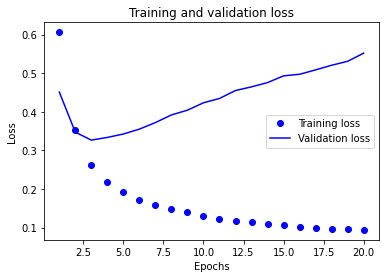

In [57]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting graph between Training and Validation accuracy

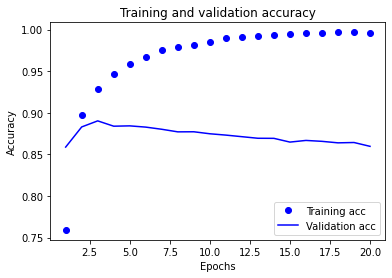

In [58]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [59]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 2s 31ms/step - loss: 0.2769 - accuracy: 0.9290
Epoch 2/8
49/49 [==============================] - 2s 31ms/step - loss: 0.1979 - accuracy: 0.9535
Epoch 3/8
49/49 [==============================] - 1s 31ms/step - loss: 0.1627 - accuracy: 0.9700
Epoch 4/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1459 - accuracy: 0.9756
Epoch 5/8
49/49 [==============================] - 2s 31ms/step - loss: 0.1374 - accuracy: 0.9788
Epoch 6/8
49/49 [==============================] - 2s 31ms/step - loss: 0.1295 - accuracy: 0.9823
Epoch 7/8
49/49 [==============================] - 2s 31ms/step - loss: 0.1234 - accuracy: 0.9845
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.5233 - accuracy: 0.8578


[0.5233038067817688, 0.8578400015830994]

Dropout

In [60]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6680 - accuracy: 0.5749 - val_loss: 0.5754 - val_accuracy: 0.8071
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.5568 - accuracy: 0.7085 - val_loss: 0.4474 - val_accuracy: 0.8559
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4569 - accuracy: 0.7911 - val_loss: 0.3545 - val_accuracy: 0.8747
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3867 - accuracy: 0.8390 - val_loss: 0.3120 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3354 - accuracy: 0.8671 - val_loss: 0.2905 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2981 - accuracy: 0.8902 - val_loss: 0.2793 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2615 - accuracy: 0.9074 - val_loss: 0.2738 - val_accuracy: 0.8870
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

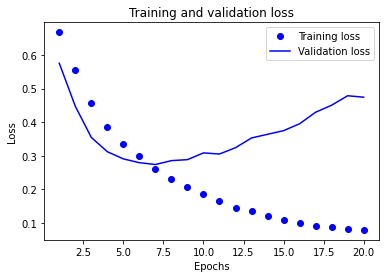

In [61]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Plotting graph between Training and Validation accuracy

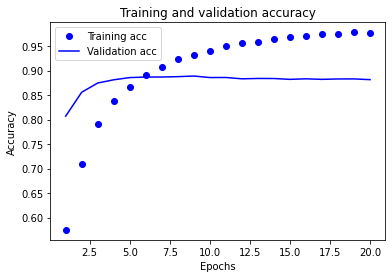

In [62]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [63]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 2s 32ms/step - loss: 0.2308 - accuracy: 0.9292
Epoch 2/8
49/49 [==============================] - 2s 31ms/step - loss: 0.1848 - accuracy: 0.9426
Epoch 3/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1633 - accuracy: 0.9504
Epoch 4/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1449 - accuracy: 0.9572
Epoch 5/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1285 - accuracy: 0.9596
Epoch 6/8
49/49 [==============================] - 1s 30ms/step - loss: 0.1195 - accuracy: 0.9634
Epoch 7/8
49/49 [==============================] - 2s 31ms/step - loss: 0.1088 - accuracy: 0.9659
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.4517 - accuracy: 0.8741


[0.45166468620300293, 0.8741199970245361]

Training the model with Hypertunned Parameters

In [64]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.2558 - accuracy: 0.5449 - val_loss: 0.2408 - val_accuracy: 0.7975
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2213 - accuracy: 0.6889 - val_loss: 0.1695 - val_accuracy: 0.8522
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1658 - accuracy: 0.8089 - val_loss: 0.1140 - val_accuracy: 0.8743
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1195 - accuracy: 0.8753 - val_loss: 0.1003 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0957 - accuracy: 0.9041 - val_loss: 0.0950 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0800 - accuracy: 0.9195 - val_loss: 0.0965 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0694 - accuracy: 0.9350 - val_loss: 0.1009 - val_accuracy: 0.8869
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

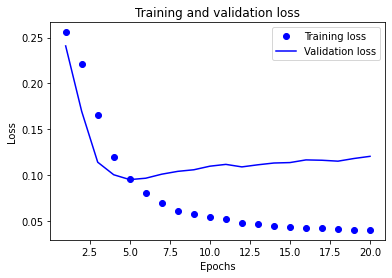

In [65]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Plotting graph between Training and Validation accuracy

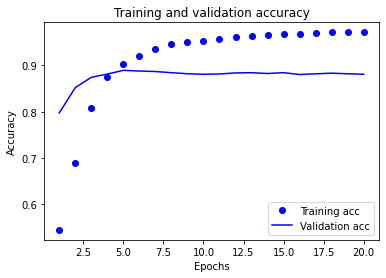

In [66]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [67]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0772 - accuracy: 0.9260
Epoch 2/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0722 - accuracy: 0.9337
Epoch 3/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0676 - accuracy: 0.9404
Epoch 4/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0637 - accuracy: 0.9462
Epoch 5/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0608 - accuracy: 0.9496
Epoch 6/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0596 - accuracy: 0.9530
Epoch 7/8
49/49 [==============================] - 2s 37ms/step - loss: 0.0555 - accuracy: 0.9574
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.1201 - accuracy: 0.8785


[0.12005572021007538, 0.8785200119018555]

Summary of all models

In [68]:
All_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularisation[0],results_tanh[0]])*100
All_Loss
All_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularisation[1],results_tanh[1]])*100
All_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularisation','model_tanh']

plt.clf()

<Figure size 432x288 with 0 Axes>

Comparing all models using graph

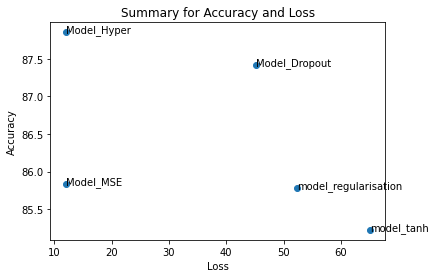

In [69]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()


Summary:
According to the graph, Model Hyper was used to achieve maximum accuracy and loss. We used three thick layers (32,32,16), each with a drop out rate of 0.5. We use MSE to compare the model's MSE loss to that of any other model (other than Final Hypertuned Model) We can see that the loss is negligible using MSE.

Units: As we increase the unit from 16, 32, 64, 128, we see that the accuracy remains relatively constant while the loss function decreases.

Increasing the number of Hidden Layers from one to three had no effect on loss function accuracy or deflection.

Loss Function: When the loss function "MSE" is used on the IMDB dataset, the loss value is minimal when compared to binary cross entropy.

The model's tanh Activation Function has a low accuracy, which reduces performance due to the vanishing gradient problem.

Regularization results in a much smaller loss with less overfitting when compared to the initial model, with the L-2 model demonstrating slightly superior accuracy.

Dropout: The dropout also helps to reduce the loss function but has no effect on accuracy.